# Speed up pandas Python Code

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Creating Dataset

In [26]:
def get_dataset(size):
    df= pd.DataFrame()
    df['Age'] =np.random.randint(15,95,size)
    df['The_time_workout']=np.random.randint(1,6,size)
    df['Sleep_time']=np.random.randint(4,8,size)
    df['Healthy_food']=np.random.choice(['roti','salad','juice','egg','shake'],size)
    df['other_food']=np.random.choice(['pizza','fired_fish','fried_chicken'],size)
    return df

## The problem
Rewarding Calculation:
- If they were in bed for more than 5 hours and workout time must be greater than 1 hour 
give them Healthy food only.
- Other wise give them them other_food
- If they are age more than 90 give them healthy food.

In [27]:
def reward_cal(row):
    if row['Age']>90:
        return row['Healthy_food']
    if row['Sleep_time'] >5 &(row['The_time_workout']):
        return row['Healthy_food']
    return row['other_food']

### loop

In [28]:
%%timeit
df = get_dataset(10)
for index,rows in df.iterrows():
    df.loc[index,"Reward"]=reward_cal(rows)


6.62 ms ± 614 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Apply

In [29]:
%%timeit
df = get_dataset(10)
df['Reward'] = df.apply(reward_cal,axis=1)

4.36 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Vectorized

In [30]:
df= get_dataset(10)

In [31]:
%%timeit
df['Reward']= df['other_food']
df.loc[(df['Sleep_time'] >5) & (df['The_time_workout']) \
    | (df['Age']>90),'Reward']= df ['Healthy_food']

1.54 ms ± 13 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


time take to execute 
#### loop
* 5.87 ms ± 41 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
* 6.05 ms ± 342 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
#### Apply
* 4.16 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
* 4.36 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
#### Vectorized
* 1.67 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
* 1.54 ms ± 13 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

## Ploting Difference

In [45]:
result = pd.DataFrame(
    [
        ['loop',3500,48.3],
        ['Apply',192,6.34],
        ['Vectorized',1.4,0.0086]

    ],
    columns=['Type','Mean','Std'],
)

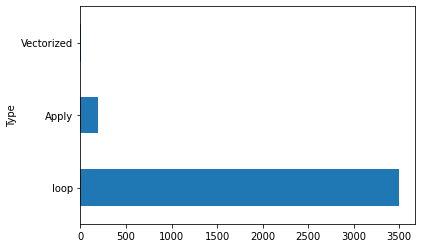

In [52]:
ax= result.set_index('Type')["Mean"].plot(kind='barh')
plt.show()